# Crystal Symmetries

        name::String
        l::Int16
        dim::Int8
        a::Array
        unit::Array
        N::Int16
        X::Array
        nnei::Int8
        neigh::Array

In [1]:
# importing our packages
push!(LOAD_PATH,".")
using Lattices;
using Statistics
using Plots
gr()

Plots.GRBackend()

In [2]:
## Define l here
l=8;

lt=MakeLattice("Honeycomb",l);

In [3]:
x_sym1=lt.X[Int(3*l/2),1]
y_sym1=maximum(lt.X[:,2])/2

xc1=lt.X[:,1].-x_sym1
yc1=lt.X[:,2].-y_sym1;

x_sym2=lt.X[l^2-l,1]
y_sym2=lt.X[l^2-l,2]

xc2=lt.X[:,1].-x_sym2
yc2=lt.X[:,2].-y_sym2;

In [66]:
function RotateCoords(θ,x,y)
    return cos(θ)*x-sin(θ)*y, sin(θ)*x+cos(θ)*y
end

function Reflect(θ,x,y)
    xh,yh =RotateCoords(-θ,xl,yl)
    return RotateCoords(θ, xh, -yh)
end

Reflect (generic function with 1 method)

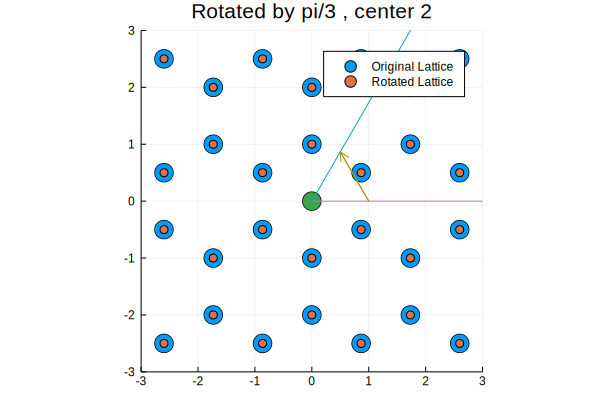

In [84]:
θ=π/3   # π/6, π/3, π/2
xl=xc1  # xc1, xc2
yl=yc1
cent=2
θl="pi/3"

xp,yp = RotateCoords(θ,xl,yl)

scatter(xl,yl,markersize=10,label="Original Lattice")
scatter!(xp,yp,label="Rotated Lattice")

scatter!([0.],[0.],markersize=10,label="")

plot!([0.,10.],[0.,0.],label="")
plot!([1.0,cos(θ)],[0.,sin(θ)],arrow=true,markersize=20,label="")
plot!([0.,10*cos(θ)],[0,10*sin(θ)],label="")

plot!(xlims=(-3,3),ylims=(-3,3),aspect_ratio=1,
    title="Rotated by $θl , center $cent")

In [97]:
xl=xc2
yl=yc2
cent=2
θ=0
θl="0"

scatter(xl,yl,markersize=10,label="Original Lattice")

xp, yp = Reflect(θ, xl, yl)
scatter!(xp,yp,label="Reflected Lattice")


scatter!([0.],[0.],label="")
plot!(x->(tan(θ)*x) ,label="Reflection Line")
if mod(θ,2π)==0
    plot!([0.,0.],[-.7,.7],arrow=true,markersize=40,label="")
else
    plot!([-.7,.7], -cot(θ)*[-.7,.7],arrow=true,markersize=40,label="")
end

plot!(xlims=(-3,3),ylims=(-3,3),
    aspect_ratio=1,
    title="Reflected around $θl center $cent")
savefig("honeycomb_reflect_2_0.svg")